In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect("factbook.db")

q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [3]:
conn

In [4]:
q

"SELECT * FROM sqlite_master WHERE type='table';"

In [8]:
q2 = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


Here are the descriptions for some of the columns:

`name` - The name of the country.

`area` - The total land and sea area of the country.

`population` - The country's population.

`population_growth` - The country's population growth as a percentage.

`birth_rate` - The country's birth rate, or the number of births a year per 1,000 people.

`death_rate` - The country's death rate, or the number of death a year per 1,000 people.

`area` - The country's total area (both land and water).

`area_land` - The country's land area in square kilometers.

`area_water` - The country's waterarea in square kilometers.


Let's run some summary statistics:

In [11]:
q3 = '''SELECT MIN(population), MAX(population), MIN(population_growth), 
      MAX(population_growth) FROM facts'''
pd.read_sql_query(q3, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


It makes us wonder, which country has population 0 and which country has approx the world population as population: 7256490011... spoilers: the latter is the Wolrd. But let's write a query that informs us:

In [13]:
q4 = '''SELECT name, population FROM facts
        WHERE population IN ('0', '7256490011')

'''
pd.read_sql_query(q4, conn)

,name,population
0,Antarctica,0
1,World,7256490011


If you're curious about Antartica you can read more at https://www.cia.gov/library/publications/the-world-factbook/geos/ay.html


Now let's do some visualisations integrating matplotlib tools:

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

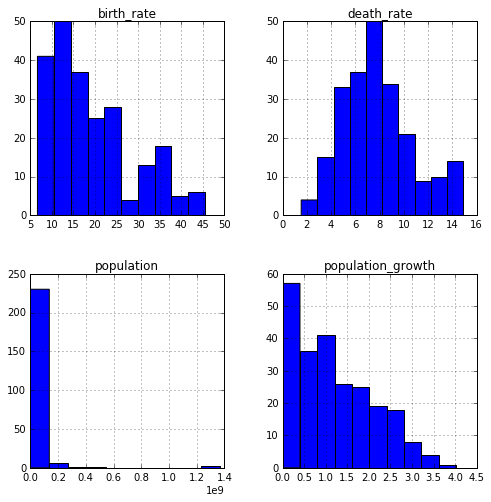

In [55]:
q5 = '''SELECT population, population_growth, birth_rate, death_rate FROM facts
        WHERE name NOT IN ('World', 'Antarctica') 

'''
pd.read_sql_query(q5, conn).hist(figsize=(8,8))
plt.show()

## Population density

We have the data of population and area of each country (with and without water). So we could calculate the population density by dividing the population over the land surface:


In [54]:
q6 = '''SELECT name, population, CAST(population AS Float) / CAST(area_land AS Float) ppl_over_km2 
        FROM facts
        WHERE name NOT IN ('Antarctica', 'World')
        ORDER BY ppl_over_km2 DESC


'''

pd.read_sql_query(q6, conn)

,name,population,ppl_over_km2
0,Macau,5.927310e+05,21168.964286
1,Monaco,3.053500e+04,15267.500000
2,Singapore,5.674472e+06,8259.784571
3,Hong Kong,7.141106e+06,6655.271202
4,Gaza Strip,1.869055e+06,5191.819444
5,Gibraltar,2.925800e+04,4876.333333
6,Bahrain,1.346613e+06,1771.859211
7,Maldives,3.932530e+05,1319.640940
8,Malta,4.139650e+05,1310.015823
9,Bermuda,7.019600e+04,1299.925926


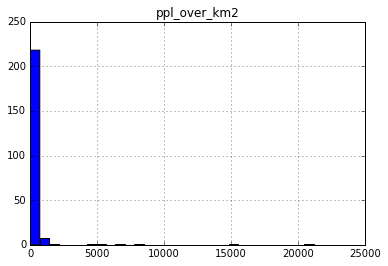

In [49]:
q7 = '''SELECT name, CAST(population AS Float) / CAST(area_land AS Float) ppl_over_km2 
        FROM facts
        WHERE population != (SELECT MAX(population) FROM facts)

'''

pd.read_sql_query(q7, conn).hist(bins=30)
plt.show()